In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import scipy.stats as sps
import statsmodels.api as sm
from statsmodels.formula.api import ols 

In [12]:
df= pd.read_csv('all_merged_2017.csv', index_col=0)
display(df.head(), df.tail())

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.7504,10694804.0,3.17129,5.859872,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.7504,10694804.0,3.17129,5.859872,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.7504,10694804.0,3.17129,5.859872,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.7504,10694804.0,3.17129,5.859872,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.7504,10694804.0,3.17129,5.859872,NaN,NaN,NaN,NaN


,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
79919,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79920,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79921,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79922,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79923,Zimbabwe,ZWE,2017,65-69 years,3.470245,6.658259,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN


### Check missing values

In [13]:
df.isnull().sum()

country                          0
code                             0
year                             0
age_range                        0
anx_age_pop                      0
dep_age_pop                      0
dep_male                         0
dep_female                       0
population                       0
male_anx                         0
female_anx                       0
avg_hours_per_worker         50947
avg_hour_per_worker_month    50947
avg_hour_per_worker_week     50947
avg_hour_per_worker_day      50947
dtype: int64

In [15]:
rows_with_missing_values = df[df.isnull().any(axis=1)]
rows_with_missing_values

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79919,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79920,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79921,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN
79922,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN


In [24]:
rows_with_missing_values['country'].value_counts()

country
Afghanistan    364
North Korea    364
Namibia        364
Nauru          364
Nepal          364
              ... 
Malta           52
Cambodia        39
Czechia         39
Poland          39
Russia          26
Name: count, Length: 155, dtype: int64

# Income inequality

In [40]:
inequality= pd.read_csv('income-inequality.csv', sep=';')

inequality= pd.melt(inequality, id_vars=['country'], var_name='year', value_name='inequality')
inequality['year']= pd.to_numeric(inequality['year'])

# filter from 1990-2017
inequality = inequality[(inequality['year']>= 1990) & (inequality['year']<2018) ]
inequality

,country,year,inequality
37430,Afghanistan,1990,37.6
37431,Angola,1990,53.1
37432,Albania,1990,26.9
37433,Andorra,1990,36.3
37434,United Arab Emirates,1990,32.8
...,...,...,...
42941,Samoa,2017,38.7
42942,Yemen,2017,36.7
42943,South Africa,2017,63.3
42944,Zambia,2017,57.1


### Merged with data

In [42]:
df= df.merge(inequality, on=['country','year'])
df

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66607,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3
66608,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3
66609,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3
66610,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3


In [43]:
df.isnull().sum(
    
)

country                          0
code                             0
year                             0
age_range                        0
anx_age_pop                      0
dep_age_pop                      0
dep_male                         0
dep_female                       0
population                       0
male_anx                         0
female_anx                       0
avg_hours_per_worker         44148
avg_hour_per_worker_month    44148
avg_hour_per_worker_week     44148
avg_hour_per_worker_day      44148
inequality                       0
dtype: int64

### AVG daily income

In [46]:
daily_income= pd.read_csv('average_daily_income.csv', sep=';')
daily_income= pd.melt(daily_income, id_vars=['country'], var_name='year', value_name='avg_daily_income')
daily_income['year']= pd.to_numeric(daily_income['year'])

# filter from 1990-2017
daily_income = daily_income[(daily_income['year']>= 1990) & (daily_income['year']<2018) ]


daily_income

,country,year,avg_daily_income
37050,Afghanistan,1990,1.51
37051,Angola,1990,5.08
37052,Albania,1990,6.55
37053,Andorra,1990,35.20
37054,United Arab Emirates,1990,141.00
...,...,...,...
42505,Samoa,2017,10.60
42506,Yemen,2017,2.40
42507,South Africa,2017,11.20
42508,Zambia,2017,2.94


In [48]:
## merged it 
df= df.merge(daily_income, on=['country','year'])
df

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality,avg_daily_income
0,Afghanistan,AFG,1990,+70 years,3.749780,5.584506,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6,1.51
1,Afghanistan,AFG,1990,15-19 years,6.723946,4.347563,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6,1.51
2,Afghanistan,AFG,1990,20-24 years,6.469231,6.074801,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6,1.51
3,Afghanistan,AFG,1990,25-29 years,6.298056,6.706133,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6,1.51
4,Afghanistan,AFG,1990,30-34 years,6.090936,7.296537,4.153338,5.750400,10694804.0,3.171290,5.859872,NaN,NaN,NaN,NaN,37.6,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66607,Zimbabwe,ZWE,2017,5-14 years,2.028723,0.375450,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3,3.97
66608,Zimbabwe,ZWE,2017,50-54 years,3.978298,5.600607,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3,3.97
66609,Zimbabwe,ZWE,2017,55-59 years,3.812911,5.912385,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3,3.97
66610,Zimbabwe,ZWE,2017,60-64 years,3.621779,6.235254,2.927176,3.824157,14751101.0,2.600006,3.452141,NaN,NaN,NaN,NaN,44.3,3.97


In [52]:
columns_round=['anx_age_pop','dep_age_pop','dep_male','dep_female','male_anx','female_anx','avg_hours_per_worker',
               'avg_hour_per_worker_month','avg_hour_per_worker_week', 'avg_hour_per_worker_day', 'avg_daily_income']

df[columns_round]=df[columns_round].round(2)
df

,country,code,year,age_range,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality,avg_daily_income
0,Afghanistan,AFG,1990,+70 years,3.75,5.58,4.15,5.75,10694804.0,3.17,5.86,NaN,NaN,NaN,NaN,37.6,1.51
1,Afghanistan,AFG,1990,15-19 years,6.72,4.35,4.15,5.75,10694804.0,3.17,5.86,NaN,NaN,NaN,NaN,37.6,1.51
2,Afghanistan,AFG,1990,20-24 years,6.47,6.07,4.15,5.75,10694804.0,3.17,5.86,NaN,NaN,NaN,NaN,37.6,1.51
3,Afghanistan,AFG,1990,25-29 years,6.30,6.71,4.15,5.75,10694804.0,3.17,5.86,NaN,NaN,NaN,NaN,37.6,1.51
4,Afghanistan,AFG,1990,30-34 years,6.09,7.30,4.15,5.75,10694804.0,3.17,5.86,NaN,NaN,NaN,NaN,37.6,1.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66607,Zimbabwe,ZWE,2017,5-14 years,2.03,0.38,2.93,3.82,14751101.0,2.60,3.45,NaN,NaN,NaN,NaN,44.3,3.97
66608,Zimbabwe,ZWE,2017,50-54 years,3.98,5.60,2.93,3.82,14751101.0,2.60,3.45,NaN,NaN,NaN,NaN,44.3,3.97
66609,Zimbabwe,ZWE,2017,55-59 years,3.81,5.91,2.93,3.82,14751101.0,2.60,3.45,NaN,NaN,NaN,NaN,44.3,3.97
66610,Zimbabwe,ZWE,2017,60-64 years,3.62,6.24,2.93,3.82,14751101.0,2.60,3.45,NaN,NaN,NaN,NaN,44.3,3.97


# Descriptive Statistics 

In [53]:
df.describe()

,year,anx_age_pop,dep_age_pop,dep_male,dep_female,population,male_anx,female_anx,avg_hours_per_worker,avg_hour_per_worker_month,avg_hour_per_worker_week,avg_hour_per_worker_day,inequality,avg_daily_income
count,66612.000000,66612.000000,66612.000000,66612.000000,66612.000000,6.661200e+04,66612.000000,66612.000000,22464.000000,22464.000000,22464.000000,22464.000000,66612.000000,66612.000000
mean,2003.500000,4.793966,5.026414,2.990665,4.597205,3.465852e+07,3.018158,5.134333,1912.657639,159.388119,36.781863,5.240087,39.463056,19.780701
std,8.077808,1.484682,2.122252,0.817490,1.114128,1.303967e+08,0.818955,1.541484,272.977555,22.748142,5.249485,0.747916,8.354945,52.707427
min,1990.000000,0.950000,0.230000,1.200000,1.850000,9.201000e+03,1.330000,2.330000,1353.890000,112.820000,26.040000,3.710000,19.100000,1.000000
25%,1996.750000,3.910000,3.870000,2.430000,3.730000,1.982481e+06,2.510000,4.010000,1717.185000,143.097500,33.020000,4.700000,33.600000,4.000000
50%,2003.500000,4.640000,5.060000,2.875000,4.620000,7.621355e+06,2.810000,4.880000,1890.360000,157.530000,36.350000,5.180000,37.900000,9.045000
75%,2010.250000,5.460000,6.290000,3.470000,5.340000,2.263497e+07,3.440000,5.910000,2094.215000,174.520000,40.270000,5.740000,44.000000,21.400000
max,2017.000000,13.740000,13.590000,6.780000,8.900000,1.410276e+09,6.160000,11.680000,2676.760000,223.060000,51.480000,7.330000,70.900000,993.000000


### Correlation

In [67]:
numeric_df_merged = df.select_dtypes(include=['number'])

# Calculate correlation matrix for numeric features
correlation_matrix = numeric_df_merged.corr()

# Print the correlation matrix
correlation_matrix

correlation_matrix.to_csv('correlation_matrix.csv')

year                        -0.101516
anx_age_pop                 -0.384266
dep_age_pop                 -0.103801
dep_male                    -0.184784
dep_female                  -0.275554
population                   0.158653
male_anx                    -0.535016
female_anx                  -0.461682
avg_hours_per_worker         1.000000
avg_hour_per_worker_month    1.000000
avg_hour_per_worker_week     1.000000
avg_hour_per_worker_day      0.999993
inequality                   0.426240
avg_daily_income            -0.197586
Name: avg_hours_per_worker, dtype: float64

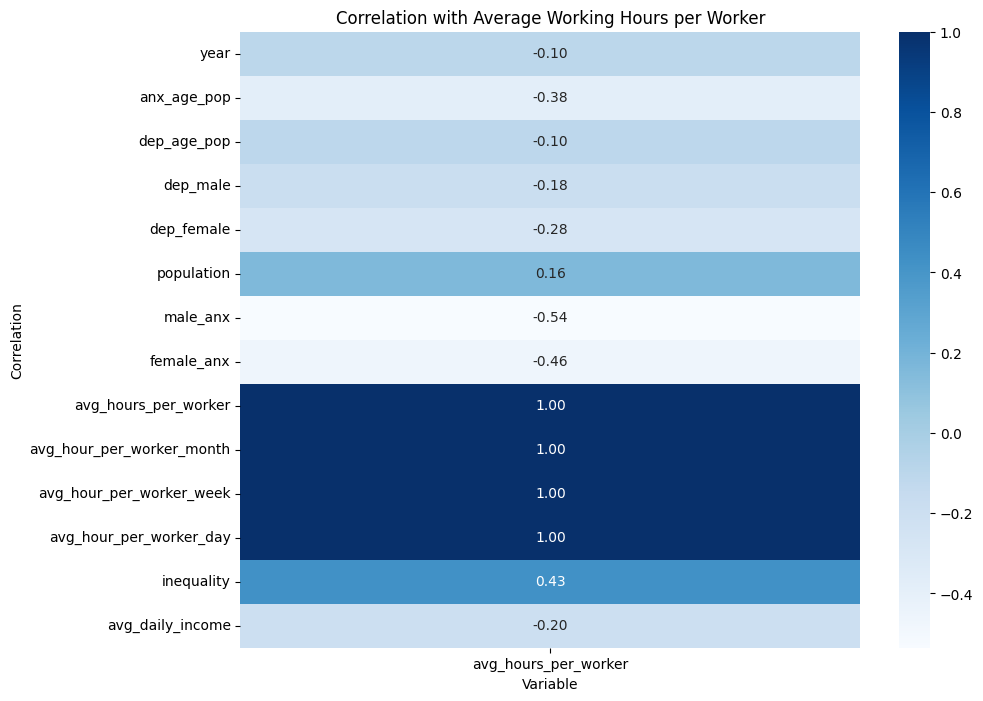

In [58]:
corr_hours = correlation_matrix['avg_hours_per_worker']
display(corr_hours)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_hours.to_frame(), cmap='Blues', annot=True, fmt=".2f")
plt.title('Correlation with Average Working Hours per Worker')
plt.xlabel('Variable')
plt.ylabel('Correlation')
plt.show()

### Distribution

<Figure size 5000x1500 with 0 Axes>

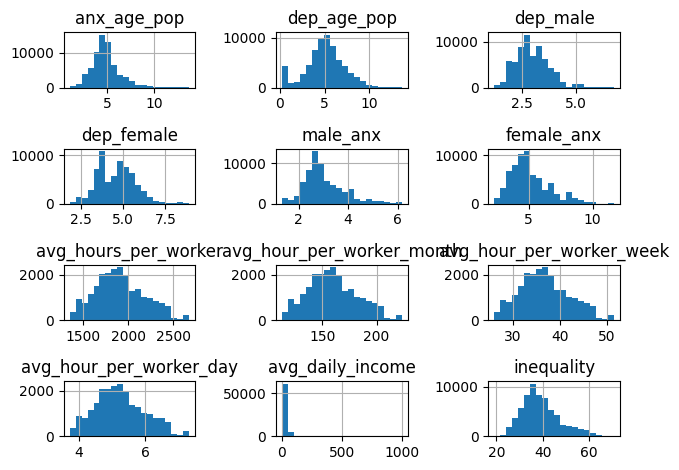

In [63]:
# distribution
plt.figure(figsize=(50, 15))
df.hist(column=['anx_age_pop', 'dep_age_pop', 'dep_male', 'dep_female', 
              'male_anx', 'female_anx', 'avg_hours_per_worker',
              'avg_hour_per_worker_month','avg_hour_per_worker_week','avg_hour_per_worker_day','avg_daily_income','inequality'], bins=20)
plt.tight_layout()
plt.show()

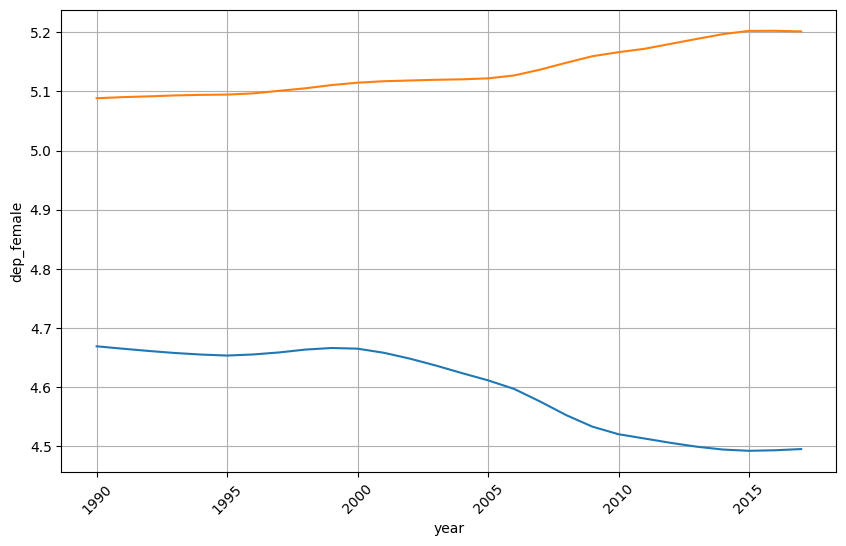

In [64]:
# Productivity Ratio remote work over time
# Aggregate data by date and calculate mean satisfaction ratio for each date
mental_trend = df.groupby('year')['dep_female'].mean()
mentalanx_trend = df.groupby('year')['female_anx'].mean()
# Plot trend in satisfaction ratio over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=mental_trend)
sns.lineplot(data=mentalanx_trend)
#plt.title('Trend in Satisfaction Ratio Working Remote Over Time')
#plt.xlabel(‘Hours’)
#plt.ylabel(‘Mean Productivity Ratio’)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [65]:
## Save df as csv
df.to_csv('anx_dep_all.csv')